# Analysis of FIFA players 2022

Football is the most popular sport in the world. There are more than 240 million football players registered to a club and billions of more fans. Every 4 years an international tournament, The World Cup, captivates billions of fans from all countries, making it the most-watched sporting event around the globe. Football fans often try and compare their favorite players and one can easily gather information about their height, weight, salary, goals, etc., however, comparisons in terms of skills between players can become subjective and difficult without an official ranking.

While specific ratings are not available in the real world of football, using the data from the FIFA video games allows us to analyze players and their skills in a more quantitative, rather than qualitative, way. The tremendous interest in football worldwide makes this a fascinating topic with a plethora of insights to uncover.

## 1. Load the data

The dataset contains the characteristics of the 19,000 players contained in the football simulation videogame *FIFA 22*. It can be downloaded here : [https://sports-statistics.com/soccer/fifa-2022-dataset-csvs/]

In [326]:
import pandas as pd
import numpy as np

data = pd.read_csv('players_22.csv', low_memory=False)
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

## 2. Cleaning

Our goal is to compare the players in a quantitative way. We will therefore remove all the qualitative data from the dataset, including the URLs. One could keep the club informations, but I decided not to because this too informative feature was hiding the real underlying patterns. Finally, I removed the goalkeepers because they were the cause of missing data.

In [327]:
# remove goalkeepers
data_field = data[data['player_positions']!='GK']

# select some columns
useful_cols = [c for c in data.columns if c not in ['sofifa_id','long_name','player_positions','club_team_id','dob','work_rate','body_type','real_face','gk','preferred_foot'] and not c.endswith('_url') and not c.startswith('club_') and not c.startswith('nation') and not c.startswith('league') and not c.startswith('player') and not c.startswith('goalkeeping')]
data_clean = data_field[useful_cols]

Some quantitative features are encoded under the form '55+3' for instance. We should therefore treat these values by keeping only the 2 first characters and turning them into integers.

In [328]:
# modify the dtype of some columns
for col in data_clean.columns[47:]:
    data_clean[col] = data_clean[col].apply(lambda x: x[:2]).astype(int)

# one-hot-encoding of the preferred foot
data_clean['right_footed'] = np.where(data_field['preferred_foot']=='Right', 1, 0)

# set index to the name of the players
data_clean = data_clean.dropna().set_index('short_name')

data_clean.head()

C:\Users\dell\AppData\Local\Temp/ipykernel_12332/3003202408.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dell\AppData\Local\Temp/ipykernel_12332/3003202408.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



overall  potential    value_eur  wage_eur  age  height_cm  \
short_name                                                                     
L. Messi                93         93   78000000.0  320000.0   34        170   
R. Lewandowski          92         92  119500000.0  270000.0   32        185   
Cristiano Ronaldo       91         91   45000000.0  270000.0   36        187   
Neymar Jr               91         91  129000000.0  270000.0   29        175   
K. De Bruyne            91         91  125500000.0  350000.0   30        181   

                   weight_kg  weak_foot  skill_moves  \
short_name                                             
L. Messi                  72          4            4   
R. Lewandowski            81          4            4   
Cristiano Ronaldo         83          4            5   
Neymar Jr                 68          5            5   
K. De Bruyne              70          5            4   

                   international_reputation  ...  ldm  cdm  rdm  rwb  lb  lcb  \
short_name                                   ...                                
L. Messi                                  5  ...   64   64   64   66  61   50   
R. Lewandowski                            5  ...   66   66   66   64  61   60   
Cristiano Ronaldo                         5  ...   59   59   59   63  60   53   
Neymar Jr                                 5  ...   63   63   63   67  62   50   
K. De Bruyne                              4  ...   80   80   80   79  75   69   

                   cb  rcb  rb  right_footed  
short_name                                    
L. Messi           50   50  61             0  
R. Lewandowski     60   60  61             1  
Cristiano Ronaldo  53   53  60             1  
Neymar Jr          50   50  62             1  
K. De Bruyne       69   69  75             1  

[5 rows x 73 columns]

<AxesSubplot:>

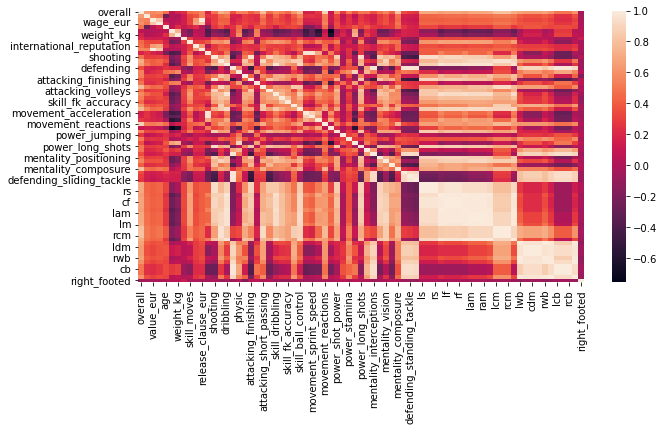

In [339]:
import seaborn as sb

sb.heatmap(data_clean.corr())

We can read from the correlation matrix that:
- the "overall" attribute is correlated to things like "dribbling" or "skill_ball_control", but not to "age" or "height"
- the last 15 attributes are highly correlated together, either positively or negatively. They probably correspond to attacking and defensive skills that are quite similar (skills finishing in 'b'='back', 'm'='middle', 'f'='front', 's'='striker')

## 3. How to make money VS How to be valuable ?

In this part, we will try to understand what are the qualities making a players well-paid or valuable. Are they the same ?

### 3.1 Explaining the wages

First, let's try to explain how much the player is paid with the other features.

In [330]:
import plotly.express as px

fig = px.scatter(data_clean, 
                 x='overall', 
                 y='wage_eur', 
                 #log_y=True,
                 hover_data=[data_clean.index],
                 color='age',
                 title='Wages in function of Overall rating')
fig.show()

We can see from this graph that the wages grow with the overall rating of the player, that sounds natural. On the contrary, the age does not look like having any influence on the wages.

Now, let's perform a linear regression to compare the influence of each feature.

Text(0.5, 1.0, '20 Most significant attributes to have high wage')

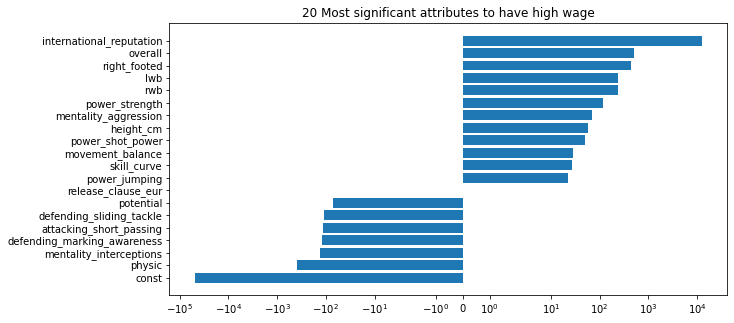

In [331]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

X = data_clean[[c for c in data_clean.columns if c not in ['value_eur', 'wage_eur']]]
X = sm.add_constant(X)

y = data_clean['wage_eur']

model = sm.OLS(y, X).fit()

# get p_values & coefs
pvals, coefs = model.pvalues, model.params
df = pd.DataFrame({'pvals':pvals, 'coefs':coefs}).sort_values('pvals').head(20).sort_values('coefs')

# plot the most significant features
plt.barh(df.index, df['coefs'])
plt.xscale('symlog')
plt.title('20 Most significant attributes to have high wage')

We can infer from the graph that the age is indeed not a significant feature. Moreover, if you want to have a high salary :
- of course, you should be a good player in general and be famous
- it's better to be right-footed
- it's better to be right-winger-back (rwb) or left-winger-back (lwb)

However, it is extremely surprising that some skills like "physic" or "defending_sliding_tackle" are related to low wages. It can be explained by the fact that attackers are much higher paid than defenders because of the entertainment they bring, therefore the players having such defending skills are usually less paid than the players who don't have them!

### 3.2 Explaining the value

In [264]:
fig = px.scatter(data_clean, 
                 x='overall', 
                 y='value_eur',
                 log_y=True,
                 hover_data=[data_clean.index],
                 color='age',
                 title='Value in function of Overall rating')
fig.show()

In this case, it is interesting to remark that the age seems to be an important feature when explaining the value of a player. Indeed, for a fixed "overall" rating, younger players a more valuable than older ones.

Text(0.5, 1.0, '20 Most significant attributes to have high value')

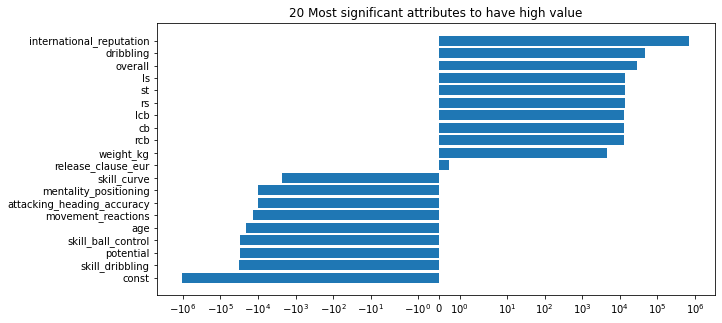

In [265]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

X = data_clean[[c for c in data_clean.columns if c not in ['value_eur', 'wage_eur']]]
X = sm.add_constant(X)

y = data_clean['value_eur']

model = sm.OLS(y, X).fit()

# get p_values & coefs
pvals, coefs = model.pvalues, model.params
df = pd.DataFrame({'pvals':pvals, 'coefs':coefs}).sort_values('pvals').head(20).sort_values('coefs')

# plot the most significant features
plt.barh(df.index, df['coefs'])
plt.xscale('symlog')
plt.title('20 Most significant attributes to have high value')

We can infer from the graph that in this case, being right-footed has no effect on your value! Moreover, if you want a high value :
- of course, you should be a good player in general and be famous
- it's better to be a good dribbler, bu with a low "skill_dribbling" (don't dribble when unnecessary)
- it's better to be a striker or a center-back
- you have to be young

## 4. Clustering Players

Let's try to cluster te players in 3 groups, visualize them in the 2D plane generated by the 2 principal components of the PCA and infer some interesting thoughts.

### 4.1 Clustering

In [310]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data_clean)
X = scaler.transform(data_clean)

kmeans = KMeans(n_clusters=3).fit(X)

In [311]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)

In [312]:
X_2D = pca.transform(X)
X_2D = pd.DataFrame({'name':data_clean.index, 'pca_1':X_2D[:,0], 'pca_2':X_2D[:,1], 'cluster':kmeans.labels_})

fig = px.scatter(X_2D, 
                 x='pca_1', 
                 y='pca_2', 
                 hover_data=['name'],
                 color='cluster',
                 title='Wages in function of Overall rating')
fig.show()

The clusters are well separated in the 2D plane. By hovering a liitle bit, we realize that the well-known players are in the rightmost cluster (blue one). Probably the left-to-right vector (pca_1) conveys the meaning of "fame" or "talent". Let's have a look on the centroids of the clusters to be sure.

### 4.2 Centroids

In [319]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

df_centroids = pd.DataFrame(columns=data_clean.columns)
df_centroids.loc[len(df_centroids.index)] = centroids[0]
df_centroids.loc[len(df_centroids.index)] = centroids[1]
df_centroids.loc[len(df_centroids.index)] = centroids[2]

In [320]:
df_centroids

overall  potential     value_eur      wage_eur        age   height_cm  \
0  71.117126  73.816876  6.162232e+06  18251.704261  27.066500  179.228571   
1  62.734815  69.021652  1.040826e+06   3769.141598  24.492623  183.010155   
2  62.762043  69.795058  1.060905e+06   3610.309385  23.623962  178.855482   

   weight_kg  weak_foot  skill_moves  international_reputation  ...  \
0  73.627402   3.145363     2.848622                  1.236257  ...   
1  76.082008   2.766814     2.041196                  1.019352  ...   
2  72.488372   3.068729     2.605066                  1.008513  ...   

         ldm        cdm        rdm        rwb         lb        lcb  \
0  65.319298  65.319298  65.319298  65.644277  64.534503  62.607519   
1  58.732707  58.732707  58.732707  58.036022  59.034106  61.404100   
2  46.285507  46.285507  46.285507  48.863580  46.770764  42.367110   

          cb        rcb         rb  right_footed  
0  62.607519  62.607519  64.534503      0.717794  
1  61.404100  61.404100  59.034106      0.740372  
2  42.367110  42.367110  46.770764      0.790490  

[3 rows x 73 columns]

The first cluster (blue) has a higher "overall", "value" and "wage" than the others. It is therefore constituted by the good and famous players. The main difference between the 2 other clusters is the height and the weight: the second cluster (red) being taller and heavier than the third cluster (yellow). We can therefore guess that the bottom-to-top vector (pca_2) conveys a meaning of corpulence or, maybe, of position.

### 4.3 Analyse the components

In [324]:
components = pca.components_

df_components = pd.DataFrame(columns=data_clean.columns)
df_components.loc[len(df_components.index)] = components[0]
df_components.loc[len(df_components.index)] = components[1]

In [325]:
df_components

overall  potential  value_eur  wage_eur       age  height_cm  weight_kg  \
0  0.141403   0.092536   0.087784  0.092283  0.061934  -0.039837  -0.019122   
1  0.084241   0.035666   0.036804  0.045565  0.067378   0.080405   0.080475   

   weak_foot  skill_moves  international_reputation  ...       ldm       cdm  \
0   0.057612     0.114291                  0.074935  ...  0.083474  0.083474   
1  -0.030754    -0.065675                  0.035970  ...  0.205578  0.205578   

        rdm       rwb        lb       lcb        cb       rcb        rb  \
0  0.083474  0.099993  0.076314  0.034523  0.034523  0.034523  0.076314   
1  0.205578  0.180963  0.202914  0.230886  0.230886  0.230886  0.202914   

   right_footed  
0     -0.006904  
1     -0.009817  

[2 rows x 73 columns]

We can indeed conclude that:
- pca_1 gives a bigger weight to the skills and salary
- pca_2 gives a bigger weight to height and weight

It is confirmed by a rapid hpvering of the graph. The rightmost players (Mbappe, Messi, De Bruyne, Neymar) are known to be very good and very well paid. On the top we have Ruben Dias, Laporte, Van Dijk who are known to be very tall and powerful ; while on the bottom we have Muriel, Insigne or Coman wo are short and fast.